In [ ]:
#bibliotecas

from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import numpy as np
import matplotlib.pyplot as plt

### Questão 3

In [ ]:
# bloco - 1
client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

class ObjetoCoppelia:
    def __init__(self, nome):
        self.nome = nome
        self.objeto = sim.getObject('/' + nome)  # pega o objeto do CoppeliaSim

        # Formato [x, y, \theta]
        posicao  = sim.getObjectPosition(self.objeto)
        orientacao = sim.getObjectOrientation(self.objeto)
        self.posicao = [posicao[0],posicao[1],orientacao[2]]

    def getPosition(self):
        # Formato [x, y, \theta]
        return self.posicao
    
    def getObjetoOriginal(self):
        return self.objeto
    
    def setNewPosition(self,position):
        self.posicao = position

# Pegando objetos da cena
robot = ObjetoCoppelia("PioneerP3DX")
pessoa_1  = ObjetoCoppelia("Bill") 
pessoa_2 = ObjetoCoppelia("diningChair/Bill") 
vazo = ObjetoCoppelia("indoorPlant") 
estante = ObjetoCoppelia("rack") 
mesa = ObjetoCoppelia("customizableTable") 
manta = ObjetoCoppelia("Manta") 

objetos = {
    'Robot': robot,
    'Pessoa 1': pessoa_1,
    'Pessoa 2': pessoa_2,
    'Vazo': vazo,
    'Estante': estante,
    'Mesa': mesa,
    'Manta': manta
}

Coordenadas x, y e theta do Robot :[-1.550, -0.425, -0.436]
Coordenadas x, y e theta do Pessoa 1 :[1.650, -2.050, 1.658]
Coordenadas x, y e theta do Pessoa 2 :[-0.167, 1.471, 1.483]
Coordenadas x, y e theta do Vazo :[1.725, -1.425, -1.571]
Coordenadas x, y e theta do Estante :[-0.600, -2.225, -1.571]
Coordenadas x, y e theta do Mesa :[-0.100, 1.650, -0.000]
Coordenadas x, y e theta do Manta :[1.750, 1.427, -0.000]


/tmp/ipykernel_6492/2439426576.py:112: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


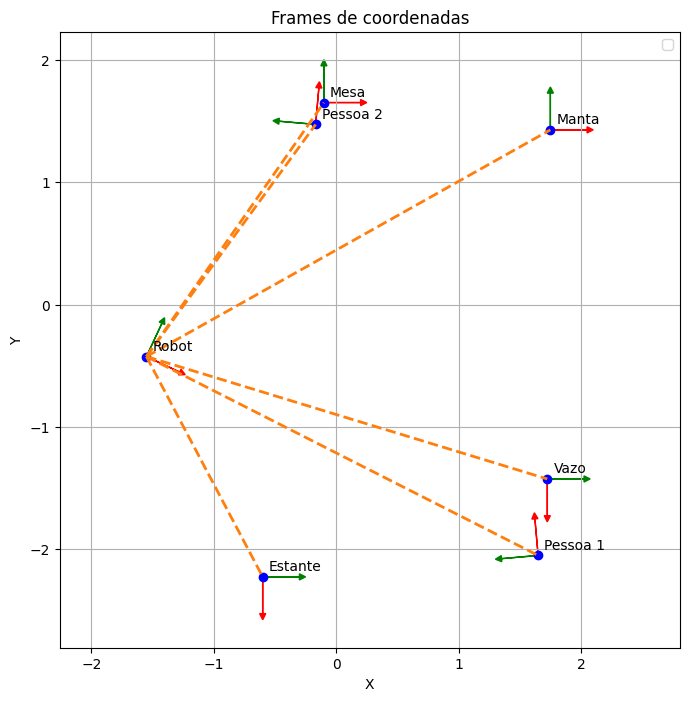

Coordenadas x, y e theta do Robot :[0.000, 0.000, 0.000]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 1: [3.587, -0.120, 2.094]
Coordenadas no referencial do robô Pessoa 1 :[3.587, -0.120, 2.094]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 2: [0.452, 2.303, 1.920]
Coordenadas no referencial do robô Pessoa 2 :[0.452, 2.303, 1.920]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Vazo: [3.391, 0.478, -1.134]
Coordenadas no referencial do robô Vazo :[3.391, 0.478, -1.134]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Estante: [1.622, -1.230, -1.134]
Coordenadas no referencial do robô Estante :[1.622, -1.230, -1.134]
--------------------------------------------------------------------------
Transformação feita pela bibli

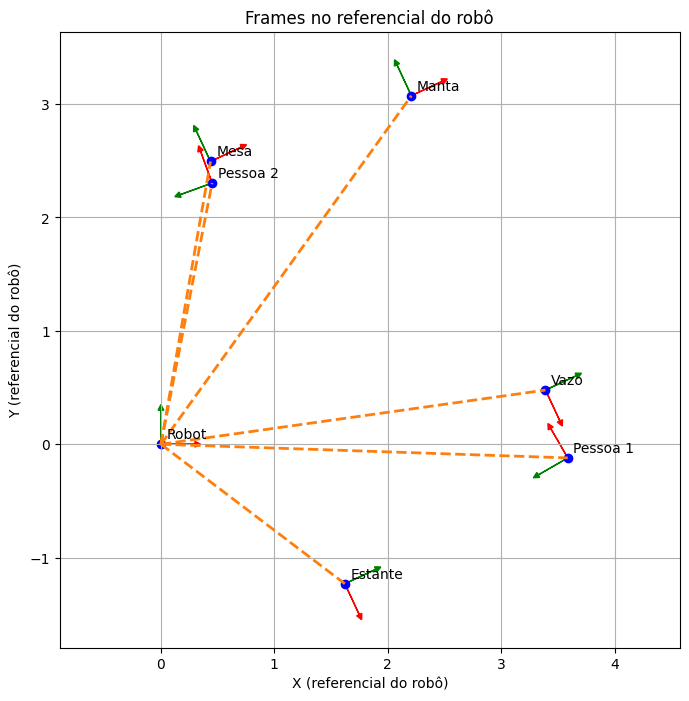

In [ ]:
# bloco 2
def plot_intercessao(obj1,obj2,color):
    plt.plot([obj1[0], obj2[0]], [obj1[1], obj2[1]], color=color, linestyle='--', linewidth=2)


def frame_global_to_robot(obj, robot):
    x_r, y_r, theta_r = robot.getPosition()
    x_o, y_o, theta_o = obj.getPosition()

    # Matriz homogênea do objeto no global
    T_obj = np.array([
        [np.cos(theta_o), -np.sin(theta_o), x_o],
        [np.sin(theta_o),  np.cos(theta_o), y_o],
        [0, 0, 1]
    ])

    # Matriz inversa do robô
    T_robot_inv = np.array([
        [np.cos(theta_r), np.sin(theta_r), -x_r*np.cos(theta_r) - y_r*np.sin(theta_r)],
        [-np.sin(theta_r), np.cos(theta_r), x_r*np.sin(theta_r) - y_r*np.cos(theta_r)],
        [0, 0, 1]
    ])

    # Transformação do objeto no referencial do robô
    T_obj_robot = T_robot_inv @ T_obj

    
    x, y = T_obj_robot[0, 2], T_obj_robot[1, 2]

    # Orientação relativa: theta_obj - theta_robot
    theta_rel = np.arctan2(T_obj_robot[1, 0], T_obj_robot[0, 0])

    return x, y, theta_rel
    



def plot_frame(objetos, robot,trasnformada):

    frame_size = 0.3

    for nome, obj in objetos.items():

        if not trasnformada:
            pos = obj.getPosition()
            x, y, theta = pos[0], pos[1], pos[2]
            plot_intercessao(robot.getPosition(), obj.getPosition(), "#ff7f0e") 
            print(f'Coordenadas x, y e theta do {nome} :[{pos[0]:.3f}, {pos[1]:.3f}, {pos[2]:.3f}]')

        if trasnformada:
            if obj == robot:
                x, y, theta = 0, 0, 0  # o robô é a origem do sistema local
                print(f'Coordenadas x, y e theta do {nome} :[{x:.3f}, {y:.3f}, {theta:.3f}]')
                
            else:
                bibPosicao = sim.getObjectPosition(obj.getObjetoOriginal(),robot.getObjetoOriginal())
                bibRotacao = sim.getObjectOrientation(obj.getObjetoOriginal(),robot.getObjetoOriginal(),)

                print("--------------------------------------------------------------------------")
                print(f"Transformação feita pela biblioteca {nome}: [{bibPosicao[0]:.3f}, {bibPosicao[1]:.3f}, {bibRotacao[2]:.3f}]")

 
                pos = obj.getPosition()
                x, y, theta = frame_global_to_robot(obj, robot)
                plot_intercessao([0,0,0], [x,y,theta], "#ff7f0e") 
                print(f'Coordenadas no referencial do robô {nome} :[{x:.3f}, {y:.3f}, {theta:.3f}]')
                

        # direção dos vetores do plot
        u_x = frame_size  * np.cos(theta)
        v_x = frame_size  * np.sin(theta)
        u_y = -frame_size * np.sin(theta)
        v_y = frame_size  * np.cos(theta)

        plt.arrow(x, y, u_x, v_x, head_width=0.05, head_length=0.05, color='red')
        plt.arrow(x, y, u_y, v_y, head_width=0.05, head_length=0.05, color='green')
        plt.text(x + 0.05, y + 0.05, nome)
        plt.scatter(x, y, color='blue')
        
        
    if not trasnformada:
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Frames de coordenadas')
        plt.grid(True)
        plt.axis('equal')
        plt.legend()
        plt.show()

    if trasnformada:
        plt.xlabel('X (referencial do robô)')
        plt.ylabel('Y (referencial do robô)')
        plt.title('Frames no referencial do robô')
        plt.grid(True)
        plt.axis('equal')
        plt.show()


plt.figure(figsize=(8,8))
plot_frame(objetos,robot,False)
plt.figure(figsize=(8,8))
plot_frame(objetos,robot,True)

### Questão 4

Coordenadas x, y e theta do Robot :[0.000, 0.000, 0.000]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 1: [-1.188, -2.126, 0.524]
Coordenadas no referencial do robô Pessoa 1 :[-1.188, -2.126, 0.524]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 2: [1.236, 1.009, 0.349]
Coordenadas no referencial do robô Pessoa 2 :[1.236, 1.009, 0.349]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Vazo: [-0.590, -1.930, -2.705]
Coordenadas no referencial do robô Vazo :[-0.590, -1.930, -2.705]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Estante: [-2.297, -0.161, -2.705]
Coordenadas no referencial do robô Estante :[-2.297, -0.161, -2.705]
--------------------------------------------------------------------------
Transformação feita pe

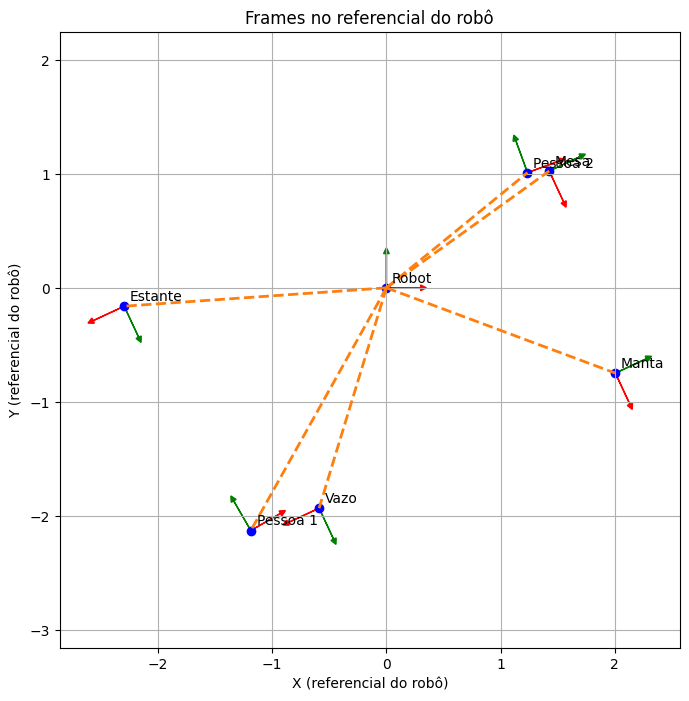

In [ ]:
plt.figure(figsize=(8,8))
plot_frame(objetos,robot,True)

Coordenadas x, y e theta do Robot :[0.000, 0.000, 0.000]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 1: [-1.843, -0.721, 0.524]
Coordenadas no referencial do robô Pessoa 1 :[-1.843, -0.721, 0.524]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 2: [0.581, 2.414, 0.349]
Coordenadas no referencial do robô Pessoa 2 :[0.581, 2.414, 0.349]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Vazo: [-1.245, -0.525, -2.705]
Coordenadas no referencial do robô Vazo :[-1.245, -0.525, -2.705]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Estante: [-2.952, 1.244, -2.705]
Coordenadas no referencial do robô Estante :[-2.952, 1.244, -2.705]
--------------------------------------------------------------------------
Transformação feita pela

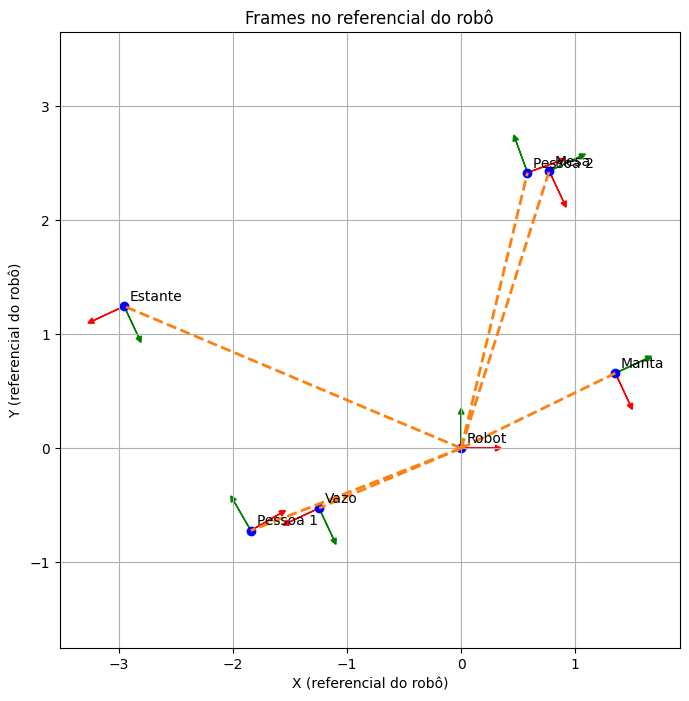

In [ ]:
plt.figure(figsize=(8,8))
plot_frame(objetos,robot,True)

In [ ]:
plt.figure(figsize=(8,8))
plot_frame(objetos,robot,True)

### Questão 4

Program started


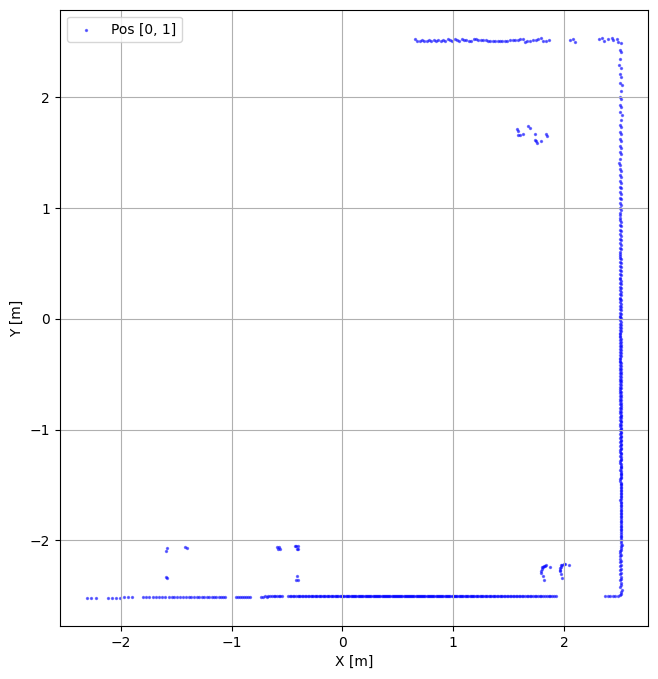

Program ended


In [ ]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

# não ta 100%, aumentar tamanho dos pontos, mexer na matriz de transformação e mostrar onde está o robo, o plot é global


def make_homogeneous_matrix(pos, ori):
    """
    Cria matriz homogênea 4x4 a partir de posição e orientação (Euler z-y-x).
    """
    x, y, z = pos
    alpha, beta, gamma = ori  # [rx, ry, rz]
    ca, cb, cg = np.cos([alpha, beta, gamma])
    sa, sb, sg = np.sin([alpha, beta, gamma])

    # Rotação composta Z-Y-X (igual ao Coppelia)
    Rz = np.array([[cg, -sg, 0],
                   [sg,  cg, 0],
                   [0,    0, 1]])
    Ry = np.array([[cb, 0, sb],
                   [0,  1, 0],
                   [-sb,0, cb]])
    Rx = np.array([[1, 0, 0],
                   [0, ca, -sa],
                   [0, sa, ca]])
    R = Rz @ Ry @ Rx

    T = np.eye(4)
    T[0:3, 0:3] = R
    T[0:3, 3] = [x, y, z]
    return T

def laser_points_to_world(sim, robotHandle, laserHandle, laser_data):
    """
    Converte pontos do laser para o referencial global.
    """
    # T_RL: laser -> robô
    pos_RL = sim.getObjectPosition(laserHandle, robotHandle)
    ori_RL = sim.getObjectOrientation(laserHandle, robotHandle)
    T_RL = make_homogeneous_matrix(pos_RL, ori_RL)

    # T_WR: robô -> mundo
    pos_WR = sim.getObjectPosition(robotHandle, sim.handle_world)
    ori_WR = sim.getObjectOrientation(robotHandle, sim.handle_world)
    T_WR = make_homogeneous_matrix(pos_WR, ori_WR)

    global_points = []
    for ang, dist in laser_data:
        if dist > 0.01 and dist < 5:
            # ponto no laser (homogêneo)
            pL = np.array([dist*np.cos(ang), dist*np.sin(ang), 0, 1])
            # transforma para o mundo
            pW = T_WR @ (T_RL @ pL)
            global_points.append([pW[0], pW[1]])
    return global_points

# --- Script principal ---
print('Program started')

client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

# Robô com laser (substituir pelo correto da cena)
robotname = 'PioneerP3DX'
robotHandle = sim.getObject('/' + robotname)
laserHandle = sim.getObject('/' + robotname + '/fastHokuyo')

# Reinicia simulação
initial_sim_state = sim.getSimulationState()
if initial_sim_state != 0:
    sim.stopSimulation()
    time.sleep(1)

sim.startSimulation()
sim.step()

# Sensor Hokuyo
hokuyo = HokuyoSensorSim(sim, "/" + robotname + "/fastHokuyo")

# Posições de teste para o robô
test_positions = [[0,0,0.138], [1,0,0.138], [0,1,0.138]]
colors = ['r', 'g', 'b']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, aspect='equal')

laser_data = hokuyo.getSensorData()
global_pts = laser_points_to_world(sim, robotHandle, laserHandle, laser_data)

lx, ly = zip(*global_pts)
ax.scatter(lx, ly, s=2, c=c, alpha=0.5, label=f"Pos {pos[:2]}")

# Finaliza
sim.stopSimulation()

ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.grid(True)
ax.legend()
plt.show()

print("Program ended")


### Questão 5

Program started
Simulation time: 0.05 [s]
Simulation time: 0.10 [s]
Simulation time: 0.15 [s]
Simulation time: 0.20 [s]
Simulation time: 0.25 [s]
Simulation time: 0.30 [s]
Simulation time: 0.35 [s]
Simulation time: 0.40 [s]
Simulation time: 0.45 [s]
Simulation time: 0.50 [s]
Simulation time: 0.55 [s]
Simulation time: 0.60 [s]
Simulation time: 0.65 [s]
Simulation time: 0.70 [s]
Simulation time: 0.75 [s]
Simulation time: 0.80 [s]
Simulation time: 0.85 [s]
Simulation time: 0.90 [s]
Simulation time: 0.95 [s]
Simulation time: 1.00 [s]
Simulation time: 1.05 [s]
Simulation time: 1.10 [s]
Simulation time: 1.15 [s]
Simulation time: 1.20 [s]
Simulation time: 1.25 [s]
Simulation time: 1.30 [s]
Simulation time: 1.35 [s]
Simulation time: 1.40 [s]
Simulation time: 1.45 [s]
Simulation time: 1.50 [s]
Simulation time: 1.55 [s]
Simulation time: 1.60 [s]
Simulation time: 1.65 [s]
Simulation time: 1.70 [s]
Simulation time: 1.75 [s]
Simulation time: 1.80 [s]
Simulation time: 1.85 [s]
Simulation time: 1.90 

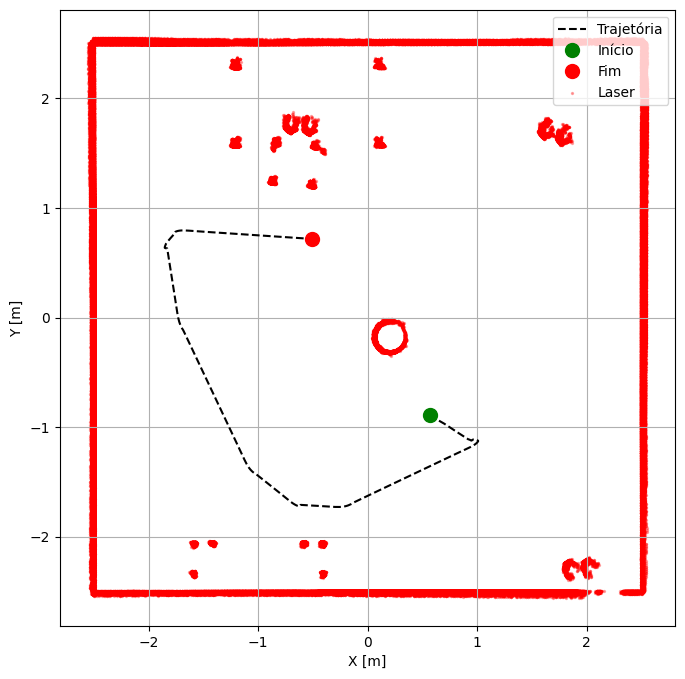

In [ ]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

class HokuyoSensorSim(object):
    _sim = None
    _base_name = ""
    _vision_sensor_name_template = "{}/sensor{}"
    _base_obj = None
    _is_range_data = False
    
    _angle_min = -120*math.pi/180
    _angle_max = 120*math.pi/180
    _angle_increment = (240/684)*math.pi/180  # angle: 240 deg, pts: 684

    def __init__(self, sim, base_name, is_range_data=True):
        self._sim = sim
        self._base_name = base_name
        self._is_range_data = is_range_data

        if "fastHokuyo" not in base_name:
            raise ValueError("ERR: fastHokuyo must be in the base object name.")

        self._base_obj = sim.getObject(base_name)
        if self._base_obj == -1:
            raise ValueError("ERR: base_obj is not a valid name in the simulation")

        self._vision_sensors_obj = [
            sim.getObject(self._vision_sensor_name_template.format(self._base_name, 1)),
            sim.getObject(self._vision_sensor_name_template.format(self._base_name, 2)),
        ]

        if any(obj == -1 for obj in self._vision_sensors_obj):
            raise ValueError("ERR: the vision sensors are not valid in the simulation")

    def getSensorData(self):
        angle = self._angle_min
        sensor_data = []
        
        for vision_sensor in self._vision_sensors_obj:
            r, t, u = sim.readVisionSensor(vision_sensor)
            if u:
                for j in range(int(u[1])):
                    for k in range(int(u[0])):
                        w = 2 + 4 * (j * int(u[0]) + k)
                        v = [u[w], u[w + 1], u[w + 2], u[w + 3]]
                        angle = angle + self._angle_increment
                        if self._is_range_data:
                            sensor_data.append([angle, v[3]])
                        else:
                            sensor_data.append([v[0], v[1], v[2]])
                            
        return np.array(sensor_data)



#atencao
def transform_laser_to_global(laser_data, robot_pos, robot_ori):
    """
    Converte leituras do laser do referencial do robô para o global.
    """
    x_r, y_r = robot_pos[0], robot_pos[1]
    theta_r = robot_ori[2]  # orientação em torno de z

    global_points = []
    for ang, dist in laser_data:
        if dist > 0.01 and dist < 5:  # filtro simples
            # coordenadas no robô
            x_local = dist * np.cos(ang)
            y_local = dist * np.sin(ang)

            # transformação para global
            x_global = x_r + x_local*np.cos(theta_r) - y_local*np.sin(theta_r)
            y_global = y_r + x_local*np.sin(theta_r) + y_local*np.cos(theta_r)

            global_points.append([x_global, y_global])

    return global_points


print('Program started')

try:
    # Conectar ao servidor
    client = RemoteAPIClient()
    sim = client.require("sim")
    sim.setStepping(True)

    # Handles
    robotname = 'PioneerP3DX'
    robotHandle = sim.getObject('/' + robotname)
    l_wheel = sim.getObject('/' + robotname + '/leftMotor')
    r_wheel = sim.getObject('/' + robotname + '/rightMotor')

    # Reinicia simulação
    initial_sim_state = sim.getSimulationState()
    if initial_sim_state != 0:
        sim.stopSimulation()
        time.sleep(1)

    sim.startSimulation()
    sim.step()

    # Sensor Hokuyo
    hokuyo_sensor = HokuyoSensorSim(sim, "/" + robotname + "/fastHokuyo")

    # Dados do Pioneer
    L = 0.381  # Metros
    r = 0.0975 # Metros

    hist = []            # trajetória do robô
    laser_global = []    # pontos do laser no mundo

    while (sim_time := sim.getSimulationTime()) < 20:
        print(f"Simulation time: {sim_time:.2f} [s]")

        # Posição e orientação do robô
        posRobo = sim.getObjectPosition(robotHandle, sim.handle_world)
        oriRobo = sim.getObjectOrientation(robotHandle, sim.handle_world)

        hist.append([posRobo[0], posRobo[1]])

        # Leitura do laser
        laser_data = hokuyo_sensor.getSensorData()
        laser_global.extend(transform_laser_to_global(laser_data, posRobo, oriRobo))

        # Controle simples de desvio
        v, w = 0, 0
        frente = int(len(laser_data) / 2)
        lado_direito = int(len(laser_data) * 1 / 4)
        lado_esquerdo = int(len(laser_data) * 3 / 4)

        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
        elif laser_data[lado_direito, 1] > 1:
            v = 0
            w = np.deg2rad(-45)
        elif laser_data[lado_esquerdo, 1] > 1:
            v = 0
            w = np.deg2rad(45)

        # Modelo cinemático
        wl = v / r - (w * L) / (2 * r)
        wr = v / r + (w * L) / (2 * r)

        sim.setJointTargetVelocity(l_wheel, wl)
        sim.setJointTargetVelocity(r_wheel, wr)

        sim.step()

    # Parar o robô
    sim.setJointTargetVelocity(r_wheel, 0)
    sim.setJointTargetVelocity(l_wheel, 0)

except Exception as e:
    print(f"An error occurred: {e}")

# Encerrar simulação
sim.stopSimulation()
print('Program ended')

# ---- PLOT FINAL ----
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Trajetória (linha tracejada)
x, y = zip(*hist)
ax.plot(x, y, '--k', label="Trajetória")

# Ponto inicial (verde) e final (vermelho)
ax.plot(x[0], y[0], 'go', markersize=10, label="Início")
ax.plot(x[-1], y[-1], 'ro', markersize=10, label="Fim")

# Laser (pontos acumulados)
if len(laser_global) > 0:
    lx, ly = zip(*laser_global)
    ax.scatter(lx, ly, s=2, c='r', alpha=0.3, label="Laser")

ax.legend()
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.grid(True)
plt.show()


# lixo

In [ ]:
import traceback
import matplotlib.pyplot as plt
import numpy as np

import time
import math

from coppeliasim_zmqremoteapi_client import RemoteAPIClient

In [ ]:
import time
import matplotlib.pyplot as plt

from coppeliasim_zmqremoteapi_client import RemoteAPIClient 

client = RemoteAPIClient() 
sim = client.require('sim') 
sim.setStepping(True) 

# Parar a simulação se estiver executando
initial_sim_state = sim.getSimulationState()
if initial_sim_state != 0:
    sim.stopSimulation()
    time.sleep(1)

objectPath = '/Bill/Bill'
objectHandle = sim.getObject(objectPath)   

hist = []
    
sim.startSimulation() 
while (t := sim.getSimulationTime()) < 25: 
    print(f'Simulation time: {t:.2f} [s]')
    
    position = sim.getObjectPosition(objectHandle, sim.handle_world)
    print('Pos: ', position)
    
    orientation = sim.getObjectOrientation(objectHandle, sim.handle_world)
    print('Ori: ', orientation)
    
    hist.append([position[0], position[1]])
    
    sim.step()
    
sim.stopSimulation()

fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

x, y = zip(*hist)
ax.scatter(x, y)

Program started
Initial Robot Position: [0.5652589009275368, -0.8903453929577292, 0.13866148545435783]
Starting robot control loop...
Simulation time: 0.05 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.10 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.15 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.20 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.25 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.30 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.35 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.40 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.45 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.50 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.55 [s]
frente: 342
lado_direito: 171
lado_esqerdo: 513
Simulation time: 0.60 [s]
frente: 342
lado_direito: 

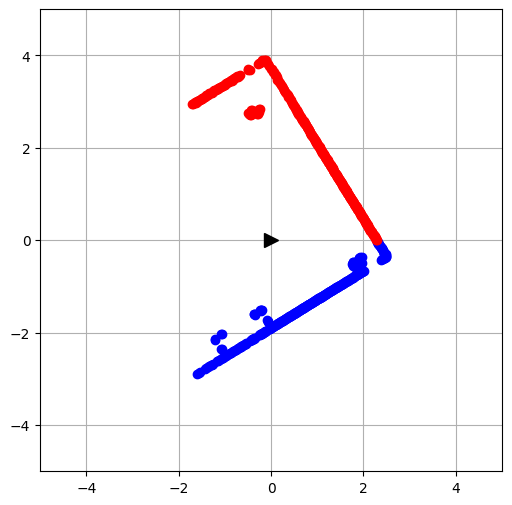

Program ended


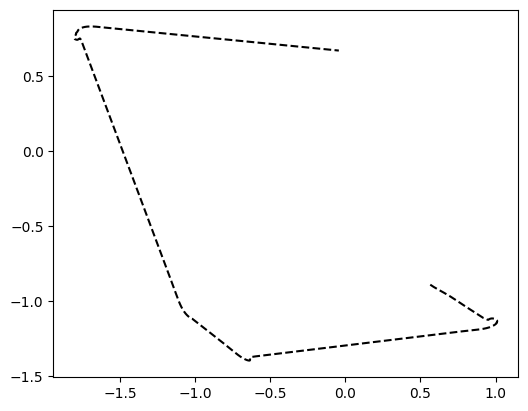

In [ ]:
class HokuyoSensorSim(object):
    """
    Simulates a Hokuyo laser sensor in CoppeliaSim using vision sensors.

    This class provides an interface to interact with a simulated Hokuyo sensor,
    typically attached to a robot in CoppeliaSim. It manages the underlying vision
    sensors and provides methods to retrieve sensor data in either range or point format.

    Attributes:
        _sim: The simulation API object used to interact with CoppeliaSim.
        _base_name (str): The name of the base object to which the Hokuyo sensor is attached.
        _is_range_data (bool): Determines if sensor data is returned as range values (True) or 3D points (False).
        _base_obj: The handle of the base object in the simulation.
        _vision_sensors_obj (list): Handles of the vision sensors used to simulate the Hokuyo sensor.

    Args:
        sim: The simulation API object.
        base_name (str): The name of the base object (must contain 'fastHokuyo').
        is_range_data (bool, optional): If True, sensor data is returned as range values. Defaults to False.

    Raises:
        ValueError: If 'fastHokuyo' is not in the base_name, or if the base object or vision sensors are not found.

    Methods:
        get_is_range_data() -> bool:
            Returns whether sensor data is returned as range values.

        set_is_range_data(is_range_data: bool) -> None:
            Sets whether sensor data should be returned as range values.

        getSensorData():
            Retrieves sensor data from the vision sensors.
            Returns either a list of range values or a list of 3D points, depending on _is_range_data.
    """

    _sim = None

    _base_name = ""
    _vision_sensor_name_template = "{}/sensor{}"

    # _vision_sensors_obj will be initialized in __init__
    _base_obj = None
    _is_range_data = False
    
    _angle_min=-120*math.pi/180
    _angle_max=120*math.pi/180
    _angle_increment=(240/684)*math.pi/180 # angle: 240 deg, pts: 684

    def __init__(self, sim, base_name, is_range_data=True):
        self._sim = sim
        self._base_name = base_name
        self._is_range_data = is_range_data

        if "fastHokuyo" not in base_name:
            raise ValueError(
                f"ERR: fastHokuyo must be in the base object name. Ex: `/PioneerP3DX/fastHokuyo`"
            )

        self._base_obj = sim.getObject(base_name)
        if self._base_obj == -1:
            raise ValueError(
                f"ERR: base_obj ({self._base_obj}) is not a valid name in the simulation"
            )

        self._vision_sensors_obj = [
            sim.getObject(self._vision_sensor_name_template.format(self._base_name, 1)),
            sim.getObject(self._vision_sensor_name_template.format(self._base_name, 2)),
        ]

        if any(obj == -1 for obj in self._vision_sensors_obj):
            raise ValueError(
                f"ERR: the _vision_sensors_obj names are not valid in the simulation"
            )

    def get_is_range_data(self) -> bool:
        return self._is_range_data

    def set_is_range_data(self, is_range_data: bool) -> None:
        self._is_range_data = is_range_data

    def getSensorData(self):
        
        angle = self._angle_min
        sensor_data = []
        
        for vision_sensor in self._vision_sensors_obj:
            r, t, u = sim.readVisionSensor(vision_sensor)
            if u:
                sensorM = sim.getObjectMatrix(vision_sensor)
                relRefM = sim.getObjectMatrix(self._base_obj)
                relRefM = sim.getMatrixInverse(relRefM)
                relRefM = sim.multiplyMatrices(relRefM, sensorM)

                p = [0, 0, 0]
                p = sim.multiplyVector(sensorM, p)
                t = [p[0], p[1], p[2], 0, 0, 0]
                for j in range(int(u[1])):
                    for k in range(int(u[0])):
                        w = 2 + 4 * (j * int(u[0]) + k)
                        v = [u[w], u[w + 1], u[w + 2], u[w + 3]]
                        angle = angle + self._angle_increment
                        if self._is_range_data:
                            sensor_data.append([angle, v[3]])
                        else:
                            p = sim.multiplyVector(relRefM, v)
                            sensor_data.append([p[0], p[1], p[2]])
                            
        return np.array(sensor_data)
    
"""
Plots the laser scan data.
"""
def draw_laser_data(laser_data, max_sensor_range=5):
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
                  
    # Combine angle and distance data for plotting
    for ang, dist in laser_data:
        # Filter out readings that are at the maximum range, as they
        # likely indicate no object was detected by that beam.
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            # Use different colors for different quadrants for clarity
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    # Plot the sensor's origin
    ax.plot(0, 0, 'k>', markersize=10)
        
    ax.grid(True)
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])
    plt.show()



print('Program started')
    
try:
    # Connect to the CoppeliaSim server
    client = RemoteAPIClient()
    sim = client.require("sim")
    sim.setStepping(True)

    # Handle para o ROBÔ
    robotname = 'PioneerP3DX'
    # The new API uses sim.getObject to get handles. The path starts with '/'
    robotHandle = sim.getObject('/' + robotname)
    
    # Handle para as juntas das RODAS
    l_wheel = sim.getObject('/' + robotname + '/leftMotor')
    r_wheel = sim.getObject('/' + robotname + '/rightMotor')
    
    # Parar a simulação se estiver executando
    initial_sim_state = sim.getSimulationState()
    if initial_sim_state != 0:
        sim.stopSimulation()
        time.sleep(1)
    
    # Inicia a simulação
    sim.startSimulation()
    sim.step()

    # Fazendo uma leitura do laser
    hokuyo_sensor = HokuyoSensorSim(sim, "/"+ robotname +"/fastHokuyo")
    initial_laser_data = hokuyo_sensor.getSensorData()
    # draw_laser_data(initial_laser_data)


    # Posição inicial do robô
    pos = sim.getObjectPosition(robotHandle, sim.handle_world)
    print(f'Initial Robot Position: {pos}')

    # Dados do Pioneer
    L = 0.381  # Metros
    r = 0.0975 # Metros
    
    print("Starting robot control loop...")

    hist = []
    
    while (sim_time := sim.getSimulationTime()) < 20:
        print(f"Simulation time: {sim_time:.2f} [s]")
        # Fazendo leitura do laser
        laser_data = hokuyo_sensor.getSensorData()
        
        
        posRobo = sim.getObjectPosition(robotHandle, sim.handle_world)
        # orientationRobo = sim.getObjectOrientation(robotHandle, sim.handle_world)
 

        hist.append([posRobo[0], posRobo[1]])

        # Velocidade básica (linear, angular)
        v = 0
        w = np.deg2rad(0)

        frente = int(len(laser_data) / 2)
        lado_direito = int(len(laser_data) * 1 / 4)
        lado_esquerdo = int(len(laser_data) * 3 / 4)


        print(f"frente: {frente}" )
        print(f"lado_direito: {lado_direito}")
        print(f"lado_esqerdo: {lado_esquerdo}")
        # Lógica de desvio de obstáculo
        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
        elif laser_data[lado_direito, 1] > 1:
            v = 0
            w = np.deg2rad(-45)
        elif laser_data[lado_esquerdo, 1] > 1:
            v = 0
            w = np.deg2rad(45)

        # Modelo cinemático
        wl = v / r - (w * L) / (2 * r)
        wr = v / r + (w * L) / (2 * r)

        # Enviando velocidades (não precisa mais de opmode)
        sim.setJointTargetVelocity(l_wheel, wl)
        sim.setJointTargetVelocity(r_wheel, wr)

        sim.step()

    # Parando o robô
    print("Stopping robot...")
    sim.setJointTargetVelocity(r_wheel, 0)
    sim.setJointTargetVelocity(l_wheel, 0)


except Exception as e:
    print(f"An error occurred: {e}")

    

draw_laser_data(initial_laser_data)    
# Parando a simulação
sim.stopSimulation()

print('Program ended')
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

x, y = zip(*hist)
ax.plot(x, y, '--', color='k')

In [ ]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

def make_homogeneous_matrix(pos, ori):
    """
    Cria matriz homogênea 4x4 a partir de posição e orientação (Euler z-y-x).
    """
    x, y, z = pos
    alpha, beta, gamma = ori  # [rx, ry, rz]
    ca, cb, cg = np.cos([alpha, beta, gamma])
    sa, sb, sg = np.sin([alpha, beta, gamma])

    # Rotação composta Z-Y-X (igual ao Coppelia)
    Rz = np.array([[cg, -sg, 0],
                   [sg,  cg, 0],
                   [0,    0, 1]])
    Ry = np.array([[cb, 0, sb],
                   [0,  1, 0],
                   [-sb,0, cb]])
    Rx = np.array([[1, 0, 0],
                   [0, ca, -sa],
                   [0, sa, ca]])
    R = Rz @ Ry @ Rx

    T = np.eye(4)
    T[0:3, 0:3] = R
    T[0:3, 3] = [x, y, z]
    return T

def laser_points_to_world(sim, robotHandle, laserHandle, laser_data):
    """
    Converte pontos do laser para o referencial global.
    """
    # T_RL: laser -> robô
    pos_RL = sim.getObjectPosition(laserHandle, robotHandle)
    ori_RL = sim.getObjectOrientation(laserHandle, robotHandle)
    T_RL = make_homogeneous_matrix(pos_RL, ori_RL)

    # T_WR: robô -> mundo
    pos_WR = sim.getObjectPosition(robotHandle, sim.handle_world)
    ori_WR = sim.getObjectOrientation(robotHandle, sim.handle_world)
    T_WR = make_homogeneous_matrix(pos_WR, ori_WR)

    global_points = []
    for ang, dist in laser_data:
        if dist > 0.01 and dist < 5:
            # ponto no laser (homogêneo)
            pL = np.array([dist*np.cos(ang), dist*np.sin(ang), 0, 1])
            # transforma para o mundo
            pW = T_WR @ (T_RL @ pL)
            global_points.append([pW[0], pW[1]])
    return global_points

# --- Script principal ---
print('Program started')

client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

# Robô com laser (substituir pelo correto da cena)
robotname = 'PioneerP3DX'
robotHandle = sim.getObject('/' + robotname)
laserHandle = sim.getObject('/' + robotname + '/fastHokuyo')

# Reinicia simulação
initial_sim_state = sim.getSimulationState()
if initial_sim_state != 0:
    sim.stopSimulation()
    time.sleep(1)

sim.startSimulation()
sim.step()

# Sensor Hokuyo
hokuyo = HokuyoSensorSim(sim, "/" + robotname + "/fastHokuyo")

# Posições de teste para o robô
test_positions = [[0,0,0.138], [1,0,0.138], [0,1,0.138]]
colors = ['r', 'g', 'b']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, aspect='equal')

laser_data = hokuyo.getSensorData()
global_pts = laser_points_to_world(sim, robotHandle, laserHandle, laser_data)

lx, ly = zip(*global_pts)
ax.scatter(lx, ly, s=2, c=c, alpha=0.5, label=f"Pos {pos[:2]}")

# Finaliza
sim.stopSimulation()

ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.grid(True)
ax.legend()
plt.show()

print("Program ended")


In [ ]:
import time
import matplotlib.pyplot as plt

from coppeliasim_zmqremoteapi_client import RemoteAPIClient 

client = RemoteAPIClient() 
sim = client.require('sim') 
sim.setStepping(True) 

# Parar a simulação se estiver executando
initial_sim_state = sim.getSimulationState()
if initial_sim_state != 0:
    sim.stopSimulation()
    time.sleep(1)

objectPath = '/Bill/Bill'
objectHandle = sim.getObject(objectPath)   

hist = []
    
sim.startSimulation() 
while (t := sim.getSimulationTime()) < 25: 
    print(f'Simulation time: {t:.2f} [s]')
    
    position = sim.getObjectPosition(objectHandle, sim.handle_world)
    print('Pos: ', position)
    
    orientation = sim.getObjectOrientation(objectHandle, sim.handle_world)
    print('Ori: ', orientation)
    
    hist.append([position[0], position[1]])
    
    sim.step()
    
sim.stopSimulation()

fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

x, y = zip(*hist)
ax.scatter(x, y)

In [29]:
def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])


# Vetor auxiliar
aux = np.array([0, 0, 0, 1])

pc = np.array([2, 2, 0, 1])

aorg = np.array([0, 0])


# Definindo Tbc
pb_corg = np.array([0, -6, 0])
Rbc = Rz(np.deg2rad(-45))
Tbc = np.column_stack((Rbc, pb_corg))
Tbc = np.row_stack((Tbc, aux))

# Definindo Tab
pa_borg = np.array([5, 10, 0])
Rab = Rz(np.deg2rad(45))
Tab = np.column_stack((Rab, pa_borg))
Tab = np.row_stack((Tab, aux))


# Definindo Tac
Tac = Tab @ Tbc


# Plotando os referenciais
plt.figure()

# Frame C->B
pa_corg = np.array(Tac[:,3])
pb_corg_aux = Rab @ pb_corg
Rac = Tac[:3,:3]
plot_frame(pa_corg, Rac, ['g', 'g'])
plt.quiver(*pa_borg[:2], *pb_corg_aux[:2], color='g', angles='xy', scale_units='xy', scale=1)

# Frame B->A
plot_frame(pa_borg, Rab, ['b', 'b'])
plt.quiver(*aorg, *pa_borg[:2], color='b', angles='xy', scale_units='xy', scale=1)


# Calculando pa
pa = Tac @ pc
print(pa)

plt.plot(pa[0], pa[1], 'o', color='darkorange')
plt.quiver(*aorg, *pa[:2], color='darkorange', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((0, 15, 0, 15))

/tmp/ipykernel_5702/2736645106.py:20: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  Tbc = np.row_stack((Tbc, aux))
/tmp/ipykernel_5702/2736645106.py:26: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  Tab = np.row_stack((Tab, aux))


NameError: name 'plot_frame' is not defined

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_23524/4111778930.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


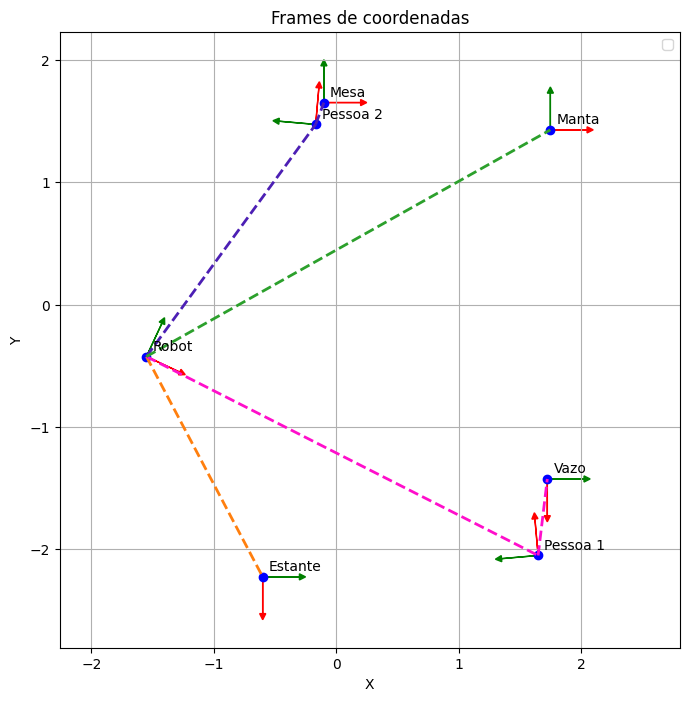

valores Pessoa 1 :1.6499999999999988 -2.05 1.658062789394722
valores conv Pessoa 1 :3.586939593845917 -0.1203717163642164 2.094395102393333
valores Pessoa 2 :-0.16741160453033582 1.4713953365152403 1.483499181291716
valores conv Pessoa 2 :0.45159932838935657 2.3030249651800148 1.919831494290327
valores Vazo :1.7250001192092896 -1.4250000596046448 -1.5707963267948994
valores conv Vazo :3.3907763975160314 0.47776701652410614 -1.1344640137962885
valores Estante :-0.5999999779463044 -2.225000015497292 -1.5707889358263265
valores conv Estante :1.6217052953549844 -1.2298666727372818 -1.1344566228277155
valores Mesa :-0.1 1.6500000000000001 -0.0
valores conv Mesa :0.4372133980911178 2.493385137625075 0.436332312998611
valores Manta :1.7500001508089298 1.4270073766354472 -0.0
valores conv Manta :2.2081236956555372 3.073129034573002 0.436332312998611


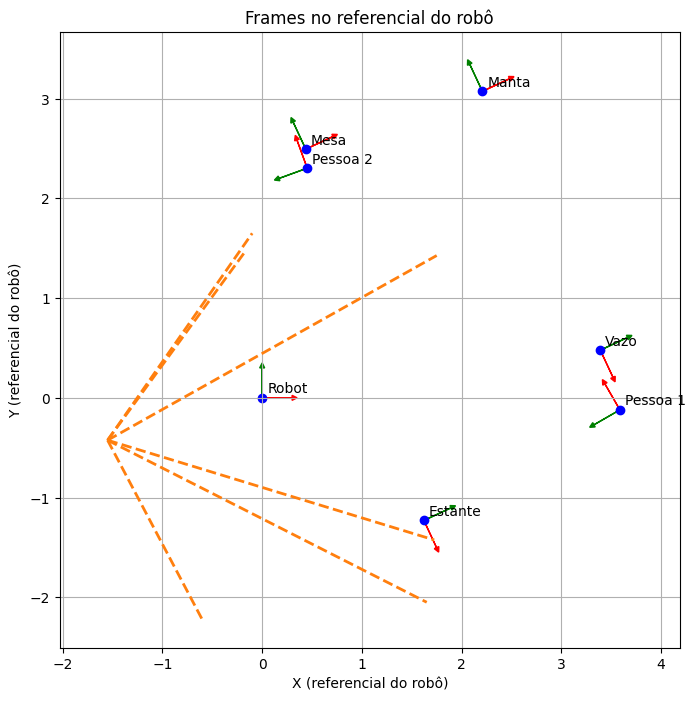

[3.5869395938459174, -0.12037171636421684, -0.1387930661439896]
[-0.0, 0.0, 2.0943951023933325]


In [ ]:
import numpy as np






def frame_global_to_robot(obj, robot):
    x_r, y_r, theta_r = robot.getPosition()
    x_o, y_o, theta_o = obj.getPosition()

    # Matriz homogênea do objeto no global
    T_obj = np.array([
        [np.cos(theta_o), -np.sin(theta_o), x_o],
        [np.sin(theta_o),  np.cos(theta_o), y_o],
        [0, 0, 1]
    ])

    # Matriz inversa do robô (global -> robô)
    T_robot_inv = np.array([
        [np.cos(theta_r), np.sin(theta_r), -x_r*np.cos(theta_r) - y_r*np.sin(theta_r)],
        [-np.sin(theta_r), np.cos(theta_r), x_r*np.sin(theta_r) - y_r*np.cos(theta_r)],
        [0, 0, 1]
    ])

    # Transformação do objeto no referencial do robô
    T_obj_robot = T_robot_inv @ T_obj

    # Posição
    x, y = T_obj_robot[0, 2], T_obj_robot[1, 2]

    # Orientação relativa: theta_obj - theta_robot
    theta_rel = np.arctan2(T_obj_robot[1, 0], T_obj_robot[0, 0])

    return x, y, theta_rel



def plot_frame_local(objetos, robot):
    frame_size = 0.3
    for nome, obj in objetos.items():
        if obj == robot:
            x, y, theta = 0, 0, 0  # o robô é a origem do sistema local
        else:
            pos = obj.getPosition()
            x, y, theta = frame_global_to_robot(obj, robot)
            print(f'valores {nome} :{pos[0]} {pos[1]} {pos[2]}')
            print(f'valores conv {nome} :{x} {y} {theta}')
            # print(f"api {sim.getObjectPosition(obj, robot)}")

        plot_intercessao(robot, obj, "#ff7f0e")   

        # Vetores locais
        u_x = frame_size * np.cos(theta)
        v_x = frame_size * np.sin(theta)
        u_y = -frame_size * np.sin(theta)
        v_y = frame_size * np.cos(theta)

        plt.arrow(x, y, u_x, v_x, head_width=0.05, head_length=0.05, color='red')
        plt.arrow(x, y, u_y, v_y, head_width=0.05, head_length=0.05, color='green')
        plt.text(x + 0.05, y + 0.05, nome)
        plt.scatter(x, y, color='blue')

    plt.xlabel('X (referencial do robô)')
    plt.ylabel('Y (referencial do robô)')
    plt.title('Frames no referencial do robô')
    plt.grid(True)
    plt.axis('equal')
    plt.show()



plt.figure(figsize=(8,8))
plot_frame(objetos)
plot_intercessao(robot, estante, "#ff7f0e")   
plot_intercessao(robot, pessoa_1, "#ff0ecb") 
plot_intercessao(pessoa_1, vazo, "#ff0ecb")  
plot_intercessao(robot, pessoa_2, "#4c1fb4") 
plot_intercessao(pessoa_2, mesa, "#4c1fb4")  
plot_intercessao(robot, manta, "#2ca02c")    



plt.show()

plt.figure(figsize=(8,8))
plot_frame_local(objetos,robot)


print(sim.getObjectPosition(pessoa_1.getObjetoOriginal(), robot.getObjetoOriginal()))
print(sim.getObjectOrientation(pessoa_1.getObjetoOriginal(), robot.getObjetoOriginal()))


In [ ]:

#limpar o codigo e deixar ele de forma reutilizavel






# Plot frames e pontos


# Linha do robô para pessoa 1
robot_pos = sim.getObjectPosition(robot)
pessoa1_pos = sim.getObjectPosition(pessoa_1)
plt.plot([robot_pos[0], pessoa1_pos[0]], [robot_pos[1], pessoa1_pos[1]], color='orange', linestyle='--', linewidth=2, label='Robot → Pessoa 1')





#lixo


# positionBill = sim.getObjectPosition(bill)

# pos = sim.getObjectPosition(bill, robot)






# print('SIM Pos: ', pos)


# print(positionBill)

# list position = sim.getObjectPosition(int bill, int relativeToObjectHandle = sim.handle_world)




# # sim.startSimulation()
# # while (t := sim.getSimulationTime()) < 5:
# #     print(f"Simulation time: {t:.2f} [s]")
# #     sim.step()
# # sim.stopSimulation()

# # Handle para o ROBÔ

    
# # Handle para as juntas das RODAS
# wheel1 = sim.getObject('/' + robotname + '/wheel0_joint')
# wheel2 = sim.getObject('/' + robotname + '/wheel1_joint')
# wheel3 = sim.getObject('/' + robotname + '/wheel2_joint')



# objectHandle = sim.getObject("Bill")

# position = sim.getObjectPosition(2, relativeToObjectHandle = sim.handle_world)

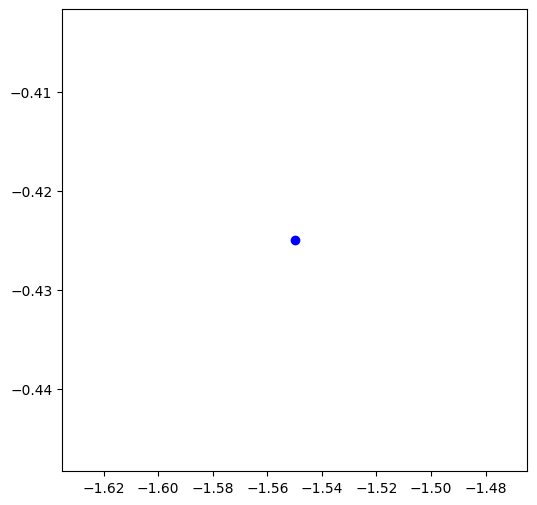

In [33]:
# pegue as posições globais usando a biblioteca

from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import numpy as np
import matplotlib.pyplot as plt


def plot_frame(Porg, R, c=['r', 'g']):
    
    axis_size = 3.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
        
    # X
    plt.quiver(*Porg[:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)






client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

robot = sim.getObject('/PioneerP3DX')
pessoa_1  = sim.getObject("/Bill")
pessoa_2 = sim.getObject("/diningChair/Bill")
vazo = sim.getObject("/indoorPlant")
estante = sim.getObject("/rack")
mesa = sim.getObject("/customizableTable")
manta = sim.getObject("/Manta")

robotPosition = sim.getObjectPosition(robot)


plt.figure(figsize=(6,6))
plt.scatter(robotPosition[0], robotPosition[1], color='blue', label='Pontos')

# # Opcional: adicionar setas indicando o ângulo theta
# for xi, yi, thetai in zip(robotPosition[0], robotPosition[1], 30):
#     dx = 0.5 * np.cos(thetai)  # tamanho da seta
#     dy = 0.5 * np.sin(thetai)
#     plt.arrow(xi, yi, dx, dy, head_width=0.1, head_length=0.1, color='red')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Plot de coordenadas [x, y, θ]')
# plt.grid(True)
# plt.axis('equal')
# plt.legend()
# plt.show()

# Plotando os referenciais
# plt.figure()
# plot_frame( sim.getObjectPosition(robot), sim.getObjectPosition(pessoa_1),['g','g'])




# Frame C->B
# pa_corg = np.array(Tac[:,3])
# pb_corg_aux = Rab @ pb_corg
# Rac = Tac[:3,:3]
# plot_frame(pa_corg, Rac, ['g', 'g'])
# plt.quiver(*pa_borg[:2], *pb_corg_aux[:2], color='g', angles='xy', scale_units='xy', scale=1)



# plot cada referencia usando matplot
# aplique as transformações compostas
# compare com os resultados obtido pela biblioteca 


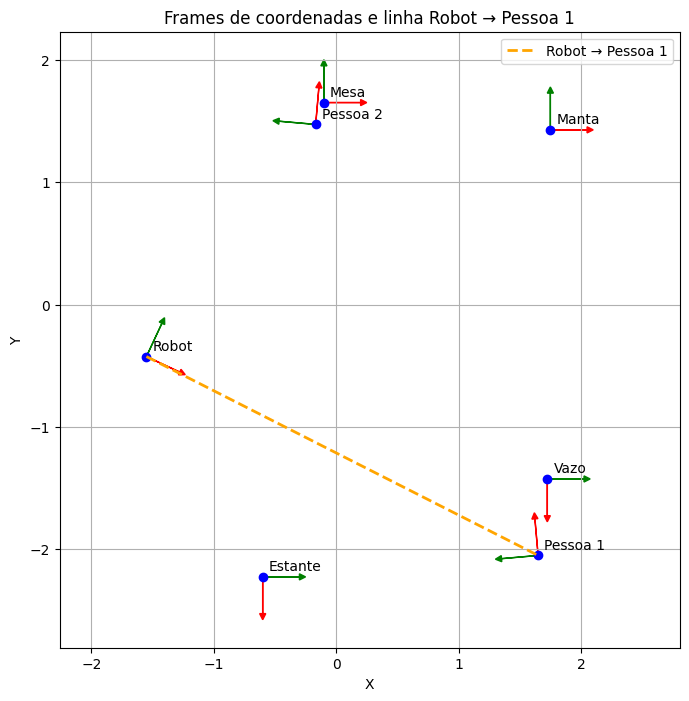

In [34]:
import matplotlib.pyplot as plt
import numpy as np

objetos = {
    'Robot': robot,
    'Pessoa 1': pessoa_1,
    'Pessoa 2': pessoa_2,
    'Vazo': vazo,
    'Estante': estante,
    'Mesa': mesa,
    'Manta': manta
}

frame_size = 0.3
plt.figure(figsize=(8,8))

# Plot frames e pontos
for nome, obj in objetos.items():
    pos = sim.getObjectPosition(obj)
    x, y = pos[0], pos[1]

    try:
        orientation = sim.getObjectOrientation(obj)
        theta = orientation[2]
    except:
        theta = 0

    u_x = frame_size * np.cos(theta)
    v_x = frame_size * np.sin(theta)
    u_y = -frame_size * np.sin(theta)
    v_y = frame_size * np.cos(theta)

    plt.arrow(x, y, u_x, v_x, head_width=0.05, head_length=0.05, color='red')
    plt.arrow(x, y, u_y, v_y, head_width=0.05, head_length=0.05, color='green')
    plt.text(x + 0.05, y + 0.05, nome)
    plt.scatter(x, y, color='blue')

# Linha do robô para pessoa 1
robot_pos = sim.getObjectPosition(robot)
pessoa1_pos = sim.getObjectPosition(pessoa_1)
plt.plot([robot_pos[0], pessoa1_pos[0]], [robot_pos[1], pessoa1_pos[1]], color='orange', linestyle='--', linewidth=2, label='Robot → Pessoa 1')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Frames de coordenadas e linha Robot → Pessoa 1')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


#### Transformações homogêneas


In [ ]:
pb = np.array([3, 7, 0, 1])

pa_borg = np.array([10, 5, 0])

theta = np.deg2rad(30)
Rab = Rz(theta)

# Concatena o vetor origem ao final (coluna)
Tab = np.column_stack((Rab, pa_borg))
print(Tab)

# Concatena o vetor auxiliar embaixo (linha)
aux = np.array([0, 0, 0, 1])
Tab = np.row_stack((Tab, aux))
print(Tab)

pa = Tab @ pb
print(pa)


# Plotando os referenciais
plt.figure()
plot_frame(pa_borg, Rab, ['g', 'g'])

# Vetor Pa_borg
pa_org = np.array([0, 0])
plt.quiver(*pa_org[:2], *pa_borg[:2], color='g', angles='xy', scale_units='xy', scale=1)

# Vetor Pb
pb_aux = Rab @ pb[:3]
plt.quiver(*pa_borg[:2], *pb_aux[:2], color='g', angles='xy', scale_units='xy', scale=1)

# Vetor Pa
plt.quiver(*pa_org[:2], *pa[:2], color='b', angles='xy', scale_units='xy', scale=1)

plt.plot(pa[0], pa[1], 'o', color='b')

plt.axis('scaled')
plt.axis((0, 14, 0, 14))

#### Transformações compostas

In [ ]:
# 5)
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from coppeliasim_zmqremoteapi_client import RemoteAPIClient 

# ===== Funções de transformação homogênea =====
def homog_matrix(R, t):
    """ Cria matriz homogênea 4x4 a partir de R (3x3) e t (3x1). """
    H = np.eye(4)
    H[:3,:3] = R
    H[:3, 3] = t
    return H

def rotz(theta):
    """ Rotação em Z (ângulo theta). """
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,              0,             1]
    ])

# ===== Classe Hokuyo já existe (use a sua do código enviado) =====

# ===== Função para plotar em coordenadas globais =====
def draw_laser_global(sim, robotHandle, hokuyo_sensor, max_sensor_range=5):
    laser_data = hokuyo_sensor.getSensorData()
    
    # Posição e orientação do robô no mundo
    pos = sim.getObjectPosition(robotHandle, sim.handle_world)
    ori = sim.getObjectOrientation(robotHandle, sim.handle_world)  # Euler angles [alpha, beta, gamma]

    # Matriz de transformação do robô no mundo (WRT)
    R = rotz(ori[2])  # só yaw importa no plano
    T_wr = homog_matrix(R, np.array(pos))

    # Definir transformação do laser em relação ao robô (RLT)
    # supondo que o laser está no centro do robô, um pouco para frente (ajuste se necessário)
    offset_laser = np.array([0.1, 0.0, 0.2])  
    T_rl = homog_matrix(np.eye(3), offset_laser)

    # Combinação: WLT = WRT * RLT
    T_wl = T_wr @ T_rl

    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    for ang, dist in laser_data:
        if (max_sensor_range - dist) > 0.1:
            # ponto no referencial do laser
            p_l = np.array([dist*np.cos(ang), dist*np.sin(ang), 0, 1])

            # transforma para o mundo
            p_w = T_wl @ p_l
            ax.plot(p_w[0], p_w[1], 'r.')

    # Plotar posição do robô
    ax.plot(pos[0], pos[1], 'ko', markersize=10)
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])
    ax.grid(True)
    plt.show()


# ===== Script principal =====
print("Program started")

client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

robotname = "PioneerP3DX"
robotHandle = sim.getObject("/" + robotname)

hokuyo_sensor = HokuyoSensorSim(sim, "/" + robotname + "/fastHokuyo")

# Simulação
sim.stopSimulation()
time.sleep(1)
sim.startSimulation()
sim.step()

# Colocar robô em 3 posições diferentes e plotar
positions = [[0,0,0], [2,0,0], [0,2,math.pi/4]]
for pos in positions:
    sim.setObjectPosition(robotHandle, sim.handle_world, [pos[0], pos[1], 0])
    sim.setObjectOrientation(robotHandle, sim.handle_world, [0,0,pos[2]])
    sim.step()
    draw_laser_global(sim, robotHandle, hokuyo_sensor)

sim.stopSimulation()
print("Program ended")


In [ ]:
# 6)
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from coppeliasim_zmqremoteapi_client import RemoteAPIClient 

# ===== Funções de transformação homogênea =====
def homog_matrix(R, t):
    """ Cria matriz homogênea 4x4 a partir de R (3x3) e t (3x1). """
    H = np.eye(4)
    H[:3,:3] = R
    H[:3, 3] = t
    return H

def rotz(theta):
    """ Rotação em Z (ângulo theta). """
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,              0,             1]
    ])

# ===== Classe Hokuyo já existe (use a sua versão original) =====

def laser_to_global(sim, robotHandle, hokuyo_sensor, max_sensor_range=5):
    """Transforma leitura do laser para o referencial global"""
    laser_data = hokuyo_sensor.getSensorData()
    
    # Posição e orientação do robô no mundo
    pos = sim.getObjectPosition(robotHandle, sim.handle_world)
    ori = sim.getObjectOrientation(robotHandle, sim.handle_world)  # Euler [α, β, γ]

    # Matriz de transformação do robô no mundo (WRT)
    R = rotz(ori[2])  # só yaw importa no plano
    T_wr = homog_matrix(R, np.array(pos))

    # Definir transformação do laser em relação ao robô (RLT)
    offset_laser = np.array([0.1, 0.0, 0.2])  # ajuste se necessário
    T_rl = homog_matrix(np.eye(3), offset_laser)

    # Combinação: WLT = WRT * RLT
    T_wl = T_wr @ T_rl

    pontos = []
    for ang, dist in laser_data:
        if (max_sensor_range - dist) > 0.1:
            p_l = np.array([dist*np.cos(ang), dist*np.sin(ang), 0, 1])
            p_w = T_wl @ p_l
            pontos.append([p_w[0], p_w[1]])
    return pontos, pos


# ===== Script principal =====
print("Program started")

client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

robotname = "PioneerP3DX"
robotHandle = sim.getObject("/" + robotname)

hokuyo_sensor = HokuyoSensorSim(sim, "/" + robotname + "/fastHokuyo")

# Parar simulação se já estiver rodando
sim.stopSimulation()
time.sleep(1)
sim.startSimulation()
sim.step()

# Listas para guardar trajetória e leituras
trajetoria = []
pontos_laser = []

# Dados do Pioneer
L = 0.381  # distância entre rodas
r = 0.0975 # raio da roda

l_wheel = sim.getObject('/' + robotname + '/leftMotor')
r_wheel = sim.getObject('/' + robotname + '/rightMotor')

print("Starting navigation...")
while (sim_time := sim.getSimulationTime()) < 15:  # rodar por 15s
    # Obter leituras
    pontos, pos = laser_to_global(sim, robotHandle, hokuyo_sensor)
    pontos_laser.extend(pontos)
    trajetoria.append([pos[0], pos[1]])

    # Controle simples de navegação (segue em frente e desvia)
    laser_data = hokuyo_sensor.getSensorData()
    v, w = 0, 0
    frente = int(len(laser_data) / 2)

    if laser_data[frente, 1] > 2:
        v = 0.4
    else:
        w = np.deg2rad(30)  # gira se obstáculo à frente

    # Cinemática diferencial
    wl = v / r - (w * L) / (2 * r)
    wr = v / r + (w * L) / (2 * r)

    sim.setJointTargetVelocity(l_wheel, wl)
    sim.setJointTargetVelocity(r_wheel, wr)

    sim.step()

# Parar robô
sim.setJointTargetVelocity(l_wheel, 0)
sim.setJointTargetVelocity(r_wheel, 0)
sim.stopSimulation()

print("Plotting final map...")

# ===== Plot final =====
trajetoria = np.array(trajetoria)
pontos_laser = np.array(pontos_laser)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, aspect="equal")

# Plot trajetória
ax.plot(trajetoria[:,0], trajetoria[:,1], "k--", label="Trajetória do robô")

# Plot leituras laser
ax.scatter(pontos_laser[:,0], pontos_laser[:,1], s=5, c="r", alpha=0.5, label="Leituras do laser")

ax.legend()
ax.grid(True)
plt.show()

print("Program ended")
